In [3]:
import pandas as pd 
import numpy as np 
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import metrics

In [4]:
#Importing the data 
data = pd.read_csv('candy-data.csv')

In [5]:
#Inspecting the data 
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [6]:
data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [7]:
#Inspecting the entries that are chocolate 
data[data['chocolate'] == 1.0]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
10,Charleston Chew,1,0,0,0,1,0,0,1,0,0.604,0.511,38.975037
22,HersheyÕs Kisses,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454
23,HersheyÕs Krackel,1,0,0,0,0,1,0,1,0,0.430,0.918,62.284481
24,HersheyÕs Milk Chocolate,1,0,0,0,0,0,0,1,0,0.430,0.918,56.490501
25,HersheyÕs Special Dark,1,0,0,0,0,0,0,1,0,0.430,0.918,59.236122
27,Junior Mints,1,0,0,0,0,0,0,0,1,0.197,0.511,57.219250


In [8]:
#Inspecting the entries that aren't chocolate 
data[data['chocolate'] == 0.0]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681
11,Chewey Lemonhead Fruit Mix,0,1,0,0,0,0,0,0,1,0.732,0.511,36.017628
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
13,Dots,0,1,0,0,0,0,0,0,1,0.732,0.511,42.272076
14,Dum Dums,0,1,0,0,0,0,1,0,0,0.732,0.034,39.460556


In [9]:
#Checking for null values 
data.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [10]:
#Partitioning the data 
train_x = np.array(data['bar']).reshape(-1,1)[:68]
train_y = data['chocolate'][:68]

test_x = np.array(data['bar']).reshape(-1,1)[68:]
test_y = data['chocolate'][68:]

In [11]:
#Logistic Regression Model 
logr = linear_model.LogisticRegression(solver='lbfgs')
logr.fit(train_x,train_y)

LogisticRegression()

In [12]:
#Checking the model output for a particular bar value 
predicted = logr.predict(np.array([0.6]).reshape(-1,1))
print(predicted)

[1]


In [13]:
#Coefficient 
log_odds = logr.coef_
odds = np.exp(log_odds)

print(odds)

[[10.31725193]]


In [14]:
#Probability Function 
def logit2prob(logr,x):
  log_odds = logr.coef_ * x + logr.intercept_
  odds = np.exp(log_odds)
  probability = odds / (1 + odds)
  return probability

In [15]:
#Creating arrays to input into the model 
single_x = np.linspace(0, 1, 100) 
y = logit2prob(logr, single_x)
single_y = y.reshape(100,)

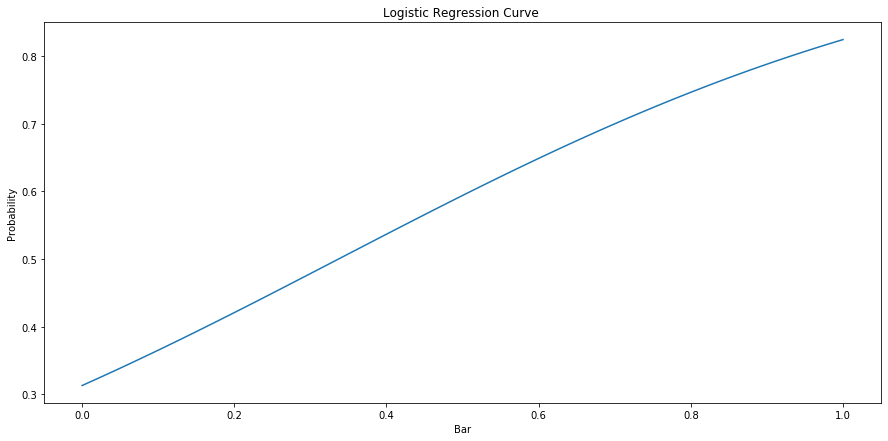

In [16]:
#Plotting the logistic regression curve 
plt.figure(1 , figsize = (15 , 7))
plt.plot(single_x, single_y) 
plt.title('Logistic Regression Curve ')
plt.xlabel('Bar') 
plt.ylabel('Probability')
plt.show()

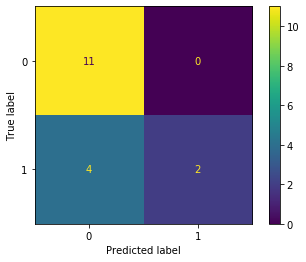

In [19]:
#Confusion Matrix 
predicted = logr.predict(test_x)
confusion_matrix = metrics.confusion_matrix(test_y, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [18]:
#Examining the precision and accuracy of the model 
precision = metrics.precision_score(test_y, predicted)
accuracy = metrics.accuracy_score(test_y, predicted)
print("The precision is {}".format(precision))
print("The accuracy is {}".format(accuracy))

The precision is 1.0
The accuracy is 0.7647058823529411
